In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from scipy.optimize import curve_fit
from scipy.stats import norm
import Perception as percept
from statsmodels.stats.anova import AnovaRM

## Functions

In [2]:
def FitCurve(vals, boundaries):

    # Curve fitting part 
    xVals = np.arange(len(vals)) # This doesn't change
    yVals = []
    yCurves = []
    jnd = []
    pseVal = []

    # choose the input and output variables
    x = xVals
    y = vals #+ random.uniform(0.0, 0.05)

    # curve fit
    popt, _ = curve_fit(percept.psyFunction, x, y, maxfev=10000, bounds=(0,boundaries))
    
    # summarize the parameter values
    a, b, c, d = popt
    
    # plot input vs output
    plt.scatter(x, y,color=[0,0,0])
    # define a sequence of inputs between the smallest and largest known inputs
    x_line = np.arange(min(x), max(x)+0.001, 0.001)
    # calculate the output for the range
    y_line = percept.psyFunction(x_line, a, b, c, d)
    
#     plt.errorbar(x, yValsMean, yValsSE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')
#     ydata = np.mean(yCurve_13, axis=0)
#     # yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
#     yerr = np.std(yCurve_13, axis=0)

    plt.plot(x_line, y_line)
    # plt.xticks(x,proprioceptiveVals)
    plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
    plt.ylabel("\n P(Real Hand Closer) \n")
    plt.ylim([-0.01, 1.01])

    plt.tight_layout()
    plt.show()
    
    return popt

In [3]:
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"
# path = "D:/OneDrive/Documents/Projects/VisualProprioceptiveGithub/Visual-Proprioceptive/VisualProprioceptive_Data/"
path = "C:/Users/dyar/OneDrive - Facebook/Projects/VP_Analysis/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [4]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Answer" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2]) # ignore first 3 header line 
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(fNameS)
#         print(float(fNameS[6]))
        
        try:
            propVal = float(fNameS[6])
        except Exception as e:
            replText = fNameS[6].replace("," , ".")
            propVal = float(replText)
#             print(e)
#             print(replText)
    
        try: 
            targPos = data.iloc[[0]["Name" == "Target_Position"]]
            stiPos = data.iloc[[1]["Name" == "Stimulus_Position"]]
            reHPos = data.iloc[[2]["Name" == "RealHand_Position"]]
            stzPos = data.iloc[[3]["Name" == "StartZone_Position"]]
            resPos = data.iloc[[4]["Name" == "Response"]]
            resP = resPos.tolist()
        except Exception as ee: 
            print(ee)
        
        if "Y" in resP[0]:
            responseVal = 1
        else:
            responseVal = 0
        
        # Convert values to list so that we can work with it 
        targP = targPos.tolist()
        stimP = stiPos.tolist()
        handP = reHPos.tolist()
        starP = stzPos.tolist()
    
        # Split each value into it's x,y and z axis 
        tp = targP[0].split(',')
        sp = stimP[0].split(',')
        rep = handP[0].split(',')
        szP = starP[0].split(',')

        # Only look at the z position of each object, because that is the only thing we changed 
        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

#         print(round(result,4))
#         print(resP[0])
    
    #-------------------------------------------------
    # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
    # if the proprioceptive value is negative and the answer is yes, then that is correct 
                
        if propVal > 0.0 and 'Y' in resP[0]:
            correct = 0
        if propVal < 0.0 and 'Y' in resP[0]:
            correct = 1
        if propVal > 0.0 and 'N'in resP[0]:
            correct = 1
        if propVal < 0.0 and 'N' in resP[0]:
            correct = 0
        if propVal == 0.0:
            correct = 2

    #-------------------------------------------------
    
        rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resP[0],correct))
        tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])
        
        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
        
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 
    
#----------------------------------------------------------------------------       

single positional indexer is out-of-bounds


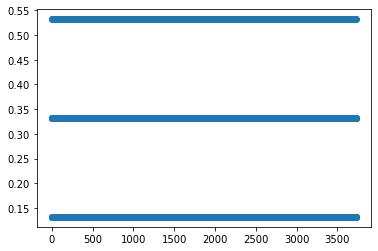

In [5]:
# Only consider three target position (Data seems to include the starting position as well)

tempTargetPos = dataFrame["TargetPos"].tolist()

targetPositions = []
i = 0
for item in tempTargetPos:
    if item > 0.005:
        targetPositions.append(item)
        i = i + 1
    
# targetPositions = [item>0.005 for item in tempTargetPos]
targetPositions

plt.plot(targetPositions,'o')
# plt.plot(dataFrame["StartZone"].tolist(),'ro')

# plt.plot(dataFrame["TargetPos"],'ro')

In [6]:
uniqueTargets = pd.unique(dataFrame["TargetPos"])

print(uniqueTargets)

df_target_13cm = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[2]]
df_target_33cm = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[0]]
df_target_53cm = dataFrame.loc[dataFrame.loc[:, "TargetPos"] == uniqueTargets[1]]

[0.332 0.532 0.132 0.   ]


In [7]:
resultDF_13cm = percept.SortClean(df_target_13cm)
resultDF_33cm = percept.SortClean(df_target_33cm)
resultDF_53cm = percept.SortClean(df_target_53cm)


[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.571
Probability 2 the real hand was ahead:  1.0
Number of participants:  177  Type:  <class 'numpy.ndarray'>
(177, 7)
[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.555
Probability 2 the real hand was ahead:  1.0
Number of participants:  163  Type:  <class 'numpy.ndarray'>
(163, 7)
[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.551
Probability 2 the real hand was ahead:  1.0
Number of participants:  151  Type:  <class 'numpy.ndarray'>
(151, 7)


In [8]:
print(len(resultDF_13cm))
print(len(resultDF_33cm))
print(len(resultDF_53cm))

resultDF_13cm.to_excel("results_13cm.xlsx")  

61
62
58


[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]


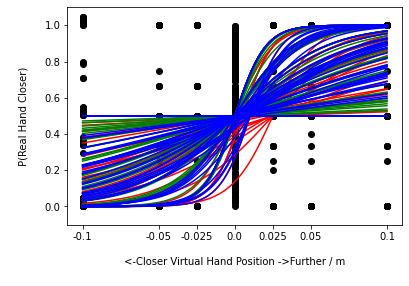

In [9]:
# 
proprioceptiveVals = df_target_13cm['ProprioceptiveVal'].unique() 
proprioceptiveVals = np.sort(proprioceptiveVals)

# These boundary values are the [mean,sd, scale, offset]
# originalBounds = [0.014,  0.056,  0.91, 0.1]
bounds_13n = [0.025, 100] #, 1.0, 0.001] #[2.01974888e-06, 3.59522881e-02, 7.60307420e-01, 1.00000000e-01]  
bounds_33n = [0.001, 100] #, 1.0, 0.001] #[0.0000001,0.02,0.5,1.0] # bounds_33n = [0.0000001,0.02,0.5,1.0] 
bounds_53n = [0.01, 100] #, 1.0, 0.001]

# Curve fitting part 
xVals = np.arange(len(proprioceptiveVals)) # This doesn't change
# xVals = np.pad(xVals, (1, 1), 'edge')
x = proprioceptiveVals
print(x)
yCurves = []
yVals = []
jnd = []
pseVal = []

jnd_13cm, pseVal_13cm, xLine_13cm, yVals_13cm, yCurve_13, bounds_13n = percept.getJND(resultDF_13cm, proprioceptiveVals, bounds_13n, 'red')
jnd_33cm, pseVal_33cm, xLine_33cm, yVals_33cm, yCurve_33, bounds_33n = percept.getJND(resultDF_33cm, proprioceptiveVals, bounds_33n, 'green')
jnd_53cm, pseVal_53cm, xLine_53cm, yVals_53cm, yCurve_53, bounds_53n = percept.getJND(resultDF_53cm, proprioceptiveVals, bounds_53n, 'blue')

# # plt.legend(['Fitted Curve','Data Points']
plt.ylim([-0.1,1.1])
plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.show()


In [10]:
(len(yCurve_33)-1)/2

30.5

In [11]:
4%2

0

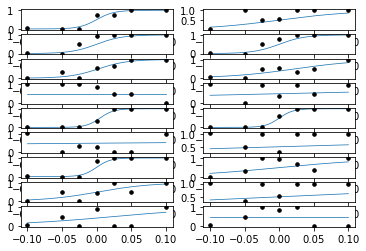

In [12]:
arrLen = 1
x = proprioceptiveVals
# print((yCurve_33))

fig, axs = plt.subplots(9, 2)

for i in range(18):
    axs[(i%9), (i%2)].plot(xLine_13cm, yCurve_13[i],linewidth=0.75)
    yValsMean = yVals_13cm[i]  
    axs[(i%9), (i%2)].plot(x, yValsMean, marker='o',color='k',ls='''''',markersize=3.5)#, yValsSE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')
    
plt.savefig('NPC_13cm_Target.png', dpi = 1200)
plt.show()


In [13]:
print(bounds_13n, '\n',bounds_33n , '\n' ,bounds_53n)

[8.37071400e-27 3.05276166e+01] 
 [1.47064424e-31 5.38885308e+00] 
 [0.01       4.48747717]


## Show results 

In [14]:
print('\n 13 cm Target')
mJND13, mdJND13, minJND13, maxJND13, mPSE13, stdErrJND13, stdErrPSE13 = percept.computeMeans(jnd_13cm, pseVal_13cm)

print('\n 33 cm Target')
mJND33, mdJND13, minJND33, maxJND33, mPSE33, stdErrJND33, stdErrPSE33 = percept.computeMeans(jnd_33cm, pseVal_33cm)

print('\n 53 cm Target')
mJND53, mdJND53, minJND53, maxJND53, mPSE53, stdErrJND53, stdErrPSE53 = percept.computeMeans(jnd_53cm, pseVal_53cm)

print('\nAverage JND for all three targets \n ')
averageJND = (mJND13 + mJND33 + mJND53)/3.0
print(np.round(averageJND,2))


 13 cm Target
    Parameters  Values
0  Average JND    5.67
1   Median JND    5.80
2      Min JND    1.10
3      Max JND   10.00
4  Average PSE    0.51

 33 cm Target
    Parameters  Values
0  Average JND    6.46
1   Median JND    7.20
2      Min JND    1.10
3      Max JND   10.00
4  Average PSE    0.02

 53 cm Target
    Parameters  Values
0  Average JND    6.31
1   Median JND    6.85
2      Min JND    1.10
3      Max JND   10.00
4  Average PSE    0.37

Average JND for all three targets 
 
6.15


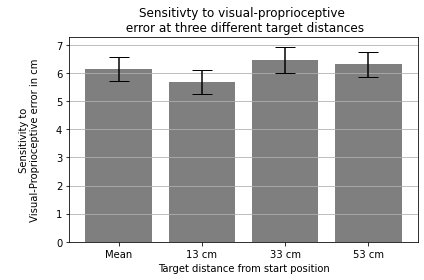

In [15]:
# Total averages across all three targets 
meanOfAll = np.mean((mJND13,mJND33,mJND53))
meanOfSE = np.mean((stdErrJND13 * 100.0, stdErrJND33 * 100.0, stdErrJND53 * 100.0))

jnds = [meanOfAll,mJND13,mJND33,mJND53]
ses = [meanOfSE,stdErrJND13 * 100.0,stdErrJND33 * 100.0,stdErrJND53 * 100.0]
x_pos = [1,2,3,4]
axisLabels = ['Mean','13 cm','33 cm','53 cm']

# plt.bar([1,2,3,4],jnds)
# plt.errorbar([1,2,3,4], ses)

fig, ax = plt.subplots()
ax.bar(x_pos, jnds, yerr=ses, align='center', alpha=0.5, ecolor='black', capsize=10, color=['black'])

ax.set_ylabel("\n Sensitivity to \n Visual-Proprioceptive error in cm \n")
ax.set_xticks(x_pos)
ax.set_xticklabels(axisLabels)
ax.set_title('Sensitivty to visual-proprioceptive \n error at three different target distances')
ax.yaxis.grid(True)

ax.set_xlabel("Target distance from start position")

# Save the figure and show
plt.tight_layout()
plt.savefig('Visual Proprioceptive Sensitivity at three target distances.png', dpi = 600)
plt.show()


In [16]:
from scipy.stats import f_oneway
from scipy import stats

# print(len(df_target_1["TargetPos"]), len(df_target_2["TargetPos"]), len(df_target_3["TargetPos"][0:350]))

# df_target_1["TargetPos"].values
# stats.kruskal(jnd_13cm,jnd_33cm,jnd_53cm)
# stats.ttest_ind(jnd_13cm,jnd_53cm, equal_var = True)

print('One-Way ANOVA:      p-val:', np.round(f_oneway(jnd_13cm,jnd_33cm,jnd_53cm)[1],3))
print('ttest: 13cm vs 53cm p-val:', np.round(stats.ttest_ind(jnd_13cm,jnd_53cm, equal_var = True)[1],3))
print('ttest: 33cm vs 53cm p-val:', np.round(stats.ttest_ind(jnd_33cm,jnd_53cm, equal_var = True)[1],3))
print('ttest: 13cm vs 33cm p-val:', np.round(stats.ttest_ind(jnd_13cm,jnd_33cm, equal_var = True)[1],3))

One-Way ANOVA:      p-val: 0.403
ttest: 13cm vs 53cm p-val: 0.296
ttest: 33cm vs 53cm p-val: 0.816
ttest: 13cm vs 33cm p-val: 0.208


# Perform the repeated measures ANOVA

In [17]:
xxx = np.nanmean(yCurve_13, axis=0)
print(np.shape(xLine_13cm))
print(np.shape(xxx))

(201,)
(201,)


(61, 201)


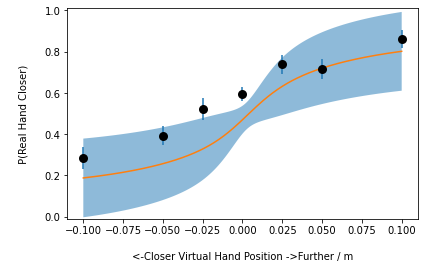

In [18]:
#----------------------------------------
#----------- 13cm Average curves ------------
#----------------------------------------
x = proprioceptiveVals

curveArrShape = np.shape(yCurve_13)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals_13cm, axis=0)  
yValsSE = np.round(np.std(yVals_13cm, axis=0)/np.sqrt(len(yVals_13cm)),4)
plt.errorbar(x, yValsMean, yValsSE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurve_13, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurve_13, axis=0)

plt.plot(xLine_13cm, ydata)
plt.fill_between(xLine_13cm, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 13 cm Target.png', dpi = 600)

plt.show()

(62, 201)


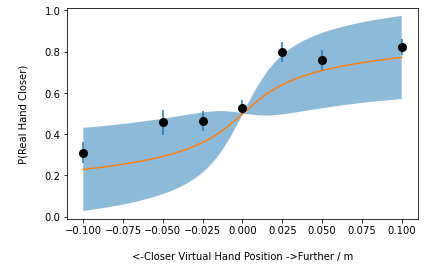

In [19]:
#----------------------------------------
#-----------  33cm Average curves ------------
#----------------------------------------
curveArrShape = np.shape(yCurve_33)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals_33cm, axis=0)  
yValsSE = np.round(np.std(yVals_33cm, axis=0)/np.sqrt(len(yVals_33cm)),4)
plt.errorbar(x, yValsMean, yValsSE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurve_33, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurve_33, axis=0)

plt.plot(xLine_33cm, ydata)
plt.fill_between(xLine_33cm, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 33 cm Target.png', dpi = 600)

plt.show()

(58, 201)


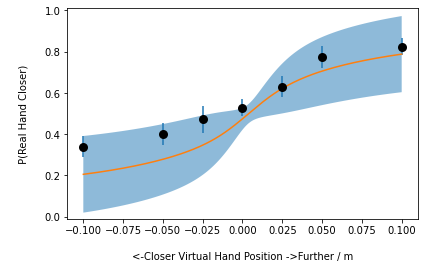

In [20]:
#----------------------------------------
#-----------  53cm Average curves ------------
#----------------------------------------


curveArrShape = np.shape(yCurve_53)
print(curveArrShape)

# plt.figure()
yValsMean = np.mean(yVals_53cm, axis=0)  
yValsSE = np.round(np.std(yVals_53cm, axis=0)/np.sqrt(len(yVals_53cm)),4)
plt.errorbar(x, yValsMean, yValsSE, marker='o',ls='''''',mfc='k',mec='k', ms=7, mew=2,mfcalt='k')

ydata = np.mean(yCurve_53, axis=0)
# yerr = np.std(yCurves, axis=0)/np.sqrt(curveArrShape[0])
yerr = np.std(yCurve_53, axis=0)

plt.plot(xLine_53cm, ydata)
plt.fill_between(xLine_53cm, ydata-yerr, ydata+yerr, alpha=0.5)
# plt.xticks(x,proprioceptiveVals)
plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
plt.ylabel("\n P(Real Hand Closer) \n")
plt.ylim([-0.01, 1.01])

plt.tight_layout()
plt.savefig('Psych Curve for 53 cm Target.png', dpi = 600)

plt.show()

[81.52261733  4.91055876]


<ipython-input-21-64153a821e73>:14: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]


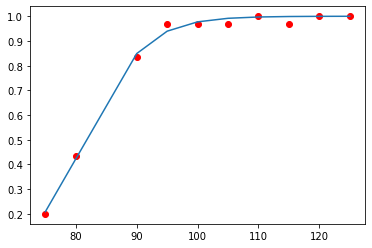

In [21]:
import numpy as np
from scipy.optimize import curve_fit
import scipy as sy
import matplotlib.pyplot as plt

d = np.array([75, 80, 90, 95, 100, 105, 110, 115, 120, 125], dtype=float)
p2 = np.array([6, 13, 25, 29, 29, 29, 30, 29, 30, 30], dtype=float) / 30. # scale to 0..1

# psychometric function
def pf(x, alpha, beta):
    return 1. / (1 + np.exp( -(x-alpha)/beta ))

# fitting
par0 = sy.array([100., 1.]) # use some good starting values, reasonable default is [0., 1.]
par, mcov = curve_fit(pf, d, p2, par0)
print(par)
plt.plot(d, p2, 'ro')
plt.plot(d, pf(d, par[0], par[1]))
plt.show()

# Old Code

In [ ]:
# for index, row in resultDF2.iterrows():

#     vals = (row['P-0.1'] + random.uniform(0.0, 0.05), row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])

#     # choose the input and output variables
#     y = vals #+ random.uniform(0.0, 0.05)
# #     y = np.pad(vals, (1, 1), 'edge')
    
#     yVals.append(y)
#     # curve fit
#     popt, _ = curve_fit(percept.psyFunction, x, y, maxfev=10000, bounds=(0,[0.014,  0.056,  0.91, 0.1])) # , bounds=(0,[2.5       , 0.0455    , 0.33999937, 0.28 ])

#     # summarize the parameter values
#     a, b, c, d = popt

#     # plot input vs output
#     plt.scatter(x, y,color=[0,0,0])

#     # define a sequence of inputs between the smallest and largest known inputs
# #     x_line = np.arange(min(x), max(x)+1, 0.1)
#     x_line = np.arange(min(x), max(x)+0.001, 0.001)


#     # calculate the output for the range
#     y_line = percept.psyFunction(x_line, a, b, c, d)

#     # Find JND sensitivity value to visual-proprioceptive errors 
#     pidx,_ = percept.find_nearest(y_line, 0.5) 
#     pse = x_line[pidx]
#     p2idx,_ = percept.find_nearest(y_line, 0.75)
#     p75 = x_line[p2idx]
#     jndVal = np.round(p75 - pse,3)
#     jnd.append(jndVal)
#     pseVal.append(pse)
# #     print("JND: ", jndVal)
    
#     # create a line plot for the mapping function
#     plt.plot(x_line, y_line, '-', color='red')
#     yCurves.append(y_line)

In [ ]:
# # print(resultDF2)
# # lines = resultDF2.plot.line()

# for index, row in resultDF2.iterrows():
#     vals = (row['P-0.1'], row['P-0.05'], row['P-0.025'], row['P0.0'], row['P0.025'], row['P0.05'], row['P0.1'])
#     plt.plot(vals,'ko')

# xVals = np.arange(len(proprioceptiveVals))
# plt.xticks(xVals,proprioceptiveVals)
# plt.xlabel("\n <-Closer Virtual Hand Position ->Further / m \n")
# plt.ylabel("\n P(Real Hand Closer) \n")
# plt.show()


# print(resultDF2['P-0.1'] + random.uniform(0.0, 0.05))

In [ ]:
# # Get proprioceptive values for the x-axis? 
# proprioceptiveVals = df_target_1['ProprioceptiveVal'].unique()
# proprioceptiveVals.sort()
# print(proprioceptiveVals)

# # Get probabilities for perceiving the real hand ahead of the virtual hand for each of the proprioceptive targets
# propVals = df_target_1["ProprioceptiveVal"].tolist()
# answers = df_target_1["Answer"].tolist()
# probabilityAhead1 = []
# for i in answers:
#     if i == 1:
#         probabilityAhead1.append(i)
# print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


# m = len(proprioceptiveVals)
# n = len(answers)
  
# probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

# for i in answers:
#     if i == 1:
#         if propVals[i] == proprioceptiveVals[0]: 
#             probabilityAhead[0][i] = i
#         if propVals[i] == proprioceptiveVals[1]: 
#             probabilityAhead[1][i] = i
#         if propVals[i] == proprioceptiveVals[2]: 
#             probabilityAhead[2][i] = i
#         if propVals[i] == proprioceptiveVals[3]: 
#             probabilityAhead[3][i] = i
#         if propVals[i] == proprioceptiveVals[4]: 
#             probabilityAhead[4][i] = i
#         if propVals[i] == proprioceptiveVals[5]: 
#             probabilityAhead[5][i] = i
#         if propVals[i] == proprioceptiveVals[6]: 
#             probabilityAhead[6][i] = i
# print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

# # How many participants? 
# participants = df_target_1['Participant_ID'].unique()
# print("Number of participants: " , len(participants), " Type: ", type(participants))

# m = len(participants)
# n = len(proprioceptiveVals)
# answrs = percept.Create2DList(m,n,3)
# print(np.shape(answrs))

# userResponseL = np.arange(n)

# # # Use a mask to sort through each participant and show their answers for each of the proprioceptive values
# for part in range(len(participants)):
#     for prop in range(len(proprioceptiveVals)):
        
#         mask1 = (df_target_1['Participant_ID']==participants[part])&(df_target_1['ProprioceptiveVal']==proprioceptiveVals[prop])
#         userRespose = df_target_1[mask1].Answer
#         userResponseL = userRespose.tolist()
# #         print(Average(userResponseL))
#         if prop == 3:
#             answrs[part][prop] = np.round(0.5 + random.uniform(-0.5, 0.5),3)
#         elif prop > 3:
#             answrs[part][prop] = percept.Average(userResponseL)  
#         else:
#             answrs[part][prop] = 1.0 - percept.Average(userResponseL) # Make sure to create sigmoid

# # print(answrs)
# # tempVals = []
# resultDF = pd.DataFrame(answrs,columns=['P-0.1','P-0.05','P-0.025','P0.0','P0.025','P0.05','P0.1'])
# resultDF.insert(0,'ParticipandID', participants, True)

# # Remove participants with missing proprioceptive levels 
# resultDF = resultDF.dropna()

# # Remove participants who obviously have messed about (i.e. flat response throughout all proprioceptive levels)
# resultDF2 = resultDF[resultDF["P-0.1"]==0.000]

